# Supporting Jupyter notebook

## Risk Management for Financial Institutions - University of Luxembourg

### Juan F. Imbet Ph.D. Paris Dauphine - PSL


Visualizing the Value at Risk

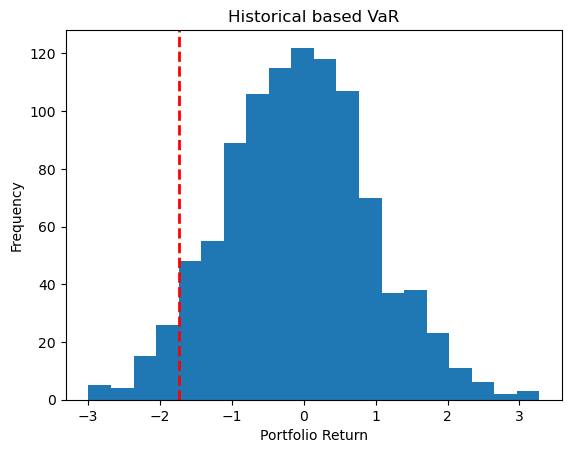

In [1]:
#%%
import numpy as np
from matplotlib import pyplot as plt

# show in a distribution the VaR of a portfolio
def showVaR(portfolio, confidence):
    # calculate the VaR of the portfolio
    VaR = np.percentile(portfolio, confidence)
    # plot the VaR
    plt.hist(portfolio, bins=20)
    plt.axvline(VaR, color='r', linestyle='dashed', linewidth=2)
    # add title and axis names
    plt.title('Historical based VaR')
    plt.xlabel('Portfolio Return')
    plt.ylabel('Frequency')
    plt.show()
    
# example of showVaR
portfolio = np.random.normal(0, 1, 1000)
showVaR(portfolio, 5)
# %%


## Portfolio Allocation Example

Load data

In [2]:
import pandas as pd
from pandas_datareader import data as wb

# load historical prices for the 50 largest US stocks
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 
           'BRK-B', 'JPM', 'JNJ', 'V', 'PG', 
           'MA', 'UNH', 'HD', 'VZ', 'INTC', 
           'DIS', 'CMCSA', 'PFE', 'ADBE', 'KO', 
           'T', 'NFLX', 'PEP', 'NVDA', 'ABT', 
           'PYPL', 'MRK', 'CRM', 'CSCO', 'TMO', 
           'AVGO', 'ORCL', 'COST', 'TSLA', 'ACN', 
           'XOM', 'BAC', 'CVX', 'WFC', 'MCD', 
           'QCOM', 'MDT', 'WMT', 'PM', 'LIN', 
           'UNP', 'UPS', 'LOW', 'BA', 'GME']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']
    
# calculate the log returns
log_returns = np.log(1 + data.pct_change())
# compute expected returns and covariance
mu = log_returns.mean() * 250
sigma = log_returns.cov() * 250



Data on common factors